In [95]:
import pandas as pd
from matplotlib import pyplot as plt

#### Lets check how many classes we have and how the labels are distributed

Total images: 950
Total classes: 12
Scentless Mayweed
Loose Silky-bent
Cleavers
Small-flowered Cranesbill
Maize
Black-grass
Sugar beet
Common Chickweed
Charlock
Common wheat
Shepherds Purse
Fat Hen


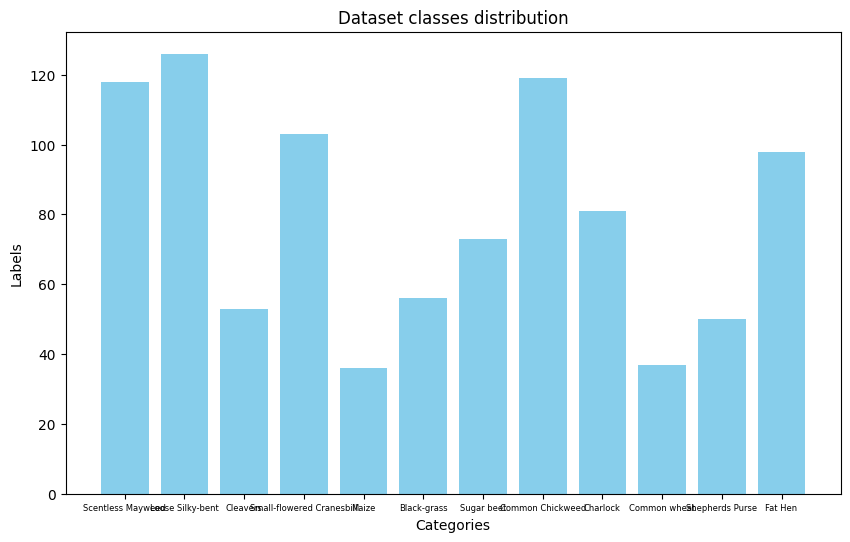

In [96]:
CSV_PATH = '../exp_1/val_data.csv'
dataset_pd = pd.read_csv(CSV_PATH, header=None)

labels = set(dataset_pd[1])
print(f'Total images: {len(dataset_pd)}')
print(f'Total classes: {len(labels)}')
print(*labels, sep='\n')

stats = {label:len(dataset_pd.loc[dataset_pd[1]==label]) for label in labels}

labels = list(stats.keys())
quantity = list(stats.values())

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, quantity, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Labels')
plt.title('Dataset classes distribution')
plt.xticks(fontsize=6)
plt.show()



### Model evaluation

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
from torchvision import transforms as T
from transformers import ViTForImageClassification, ViTImageProcessor
from typing import List
import pandas as pd
import os
from PIL import Image
import torch
import json

In [90]:
def transforms_from_checkpoint(model_path: str):
    """
    Prepare image preprocessing transforms from a checkpoint
    or use defaults.

    Parameters
    ----------
    checkpoint_path: str
        A path to a checkpoint. It should contain a file called
        "preprocessor_config.json"
        which contains the mean, std, height, and width of the images used to train
        the model.

    Returns
    -------
    transforms: torchvision.transforms.Compose
        A composition of transforms to be applied to the input image.
    """
    preprocessor_filename = os.path.join(model_path, "preprocessor_config.json")
    try:
        with open(preprocessor_filename, "r") as f:
            preprocessor_config = json.load(f)
    except FileNotFoundError:
        preprocessor_config = {}
    mean_values = preprocessor_config.get("image_mean")
    std_values = preprocessor_config.get("image_std")
    height = preprocessor_config.get("size", {}).get("height")
    width = preprocessor_config.get("size", {}).get("width")

    return T.Compose([
        T.ToTensor(),
        T.Resize((height, width)),
        T.Normalize(mean=mean_values,
                    std=std_values),
    ])

def eval_classifier(
        image_names:List[str],
        labels: List[str],
        image_folder:str, 
        model,
        transforms,
):  
    y_pred = list()
    label2id = {v: k for k, v in model.config.id2label.items()}
    y_true = [label2id[label] for label in labels]

    model.eval()
    with torch.no_grad():
        for img_name in image_names:
            image = Image.open(
                os.path.join(image_folder, img_name)).convert('RGB')
            
            inputs = transforms(image)
            inputs = torch.as_tensor(inputs['pixel_values'])
            output = model(pixel_values=inputs)
            logits = output.logits
            y_pred.append(logits.argmax(-1).item())
    
    ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)


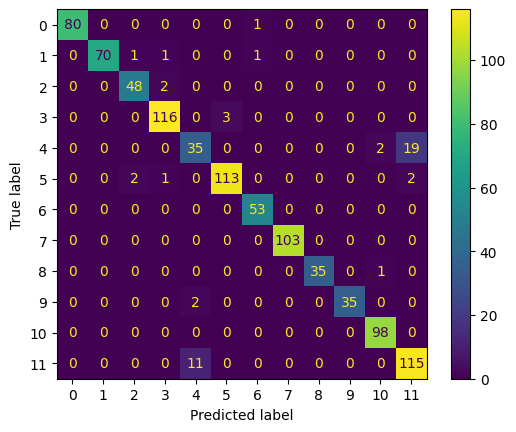

In [92]:
val_data_path = '../exp_1/val_data.csv'
image_folder = '../data/images/'
model_path = '../exp_2/checkpoint-2370'
csv_data_df = pd.read_csv(val_data_path, header=None)

processor = ViTImageProcessor.from_pretrained(model_path)
model = ViTForImageClassification.from_pretrained(model_path)

image_names=csv_data_df[0].to_list()
labels = csv_data_df[1].to_list()

eval_classifier(
    image_names=image_names, 
    image_folder=image_folder, 
    model=model, 
    transforms=processor,
    labels=labels)

In [93]:
model.config.id2label

{0: 'Charlock',
 1: 'Sugar beet',
 2: 'Shepherds Purse',
 3: 'Common Chickweed',
 4: 'Black-grass',
 5: 'Scentless Mayweed',
 6: 'Cleavers',
 7: 'Small-flowered Cranesbill',
 8: 'Maize',
 9: 'Common wheat',
 10: 'Fat Hen',
 11: 'Loose Silky-bent'}

In [ ]:
val_data_path = '../exp_1/val_data.csv'
image_folder = '../data/images/'
model_path = '../exp_3_base/checkpoint-2370'
csv_data_df = pd.read_csv(val_data_path, header=None)

processor = ViTImageProcessor.from_pretrained(model_path)
model = ViTForImageClassification.from_pretrained(model_path)

image_names=csv_data_df[0].to_list()
labels = csv_data_df[1].to_list()

eval_classifier(
    image_names=image_names, 
    image_folder=image_folder, 
    model=model, 
    transforms=processor,
    labels=labels)

In [ ]:

val_data_path = '../exp_1/val_data.csv'
image_folder = '../data/images/'
model_path = '../exp_1/checkpoint-474/'
config_file = 'config.json'


csv_data_df = pd.read_csv(val_data_path, header=None)
y_true = csv_data_df[1].to_list()


model = ViTForImageClassification.from_pretrained(model_path)

with torch.no_grad():
    y_pred = model

print(model.config.id2label)
#ConfusionMatrixDisplay.from_predictions()